#Intialization

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from skimage import io, transform
import cv2
from keras.datasets import mnist
from skimage.transform import radon, rescale,  resize, warp
from scipy import interpolate
from skimage.transform import iradon_sart
from scipy import integrate

#Problem 1

Simulate coded aperture imaging with a 59 by 59 element coding mask using the MURA coding strategy. ***Try linear reconstruction of various images, try adding noise at various levels, discuss the results that you seek.***

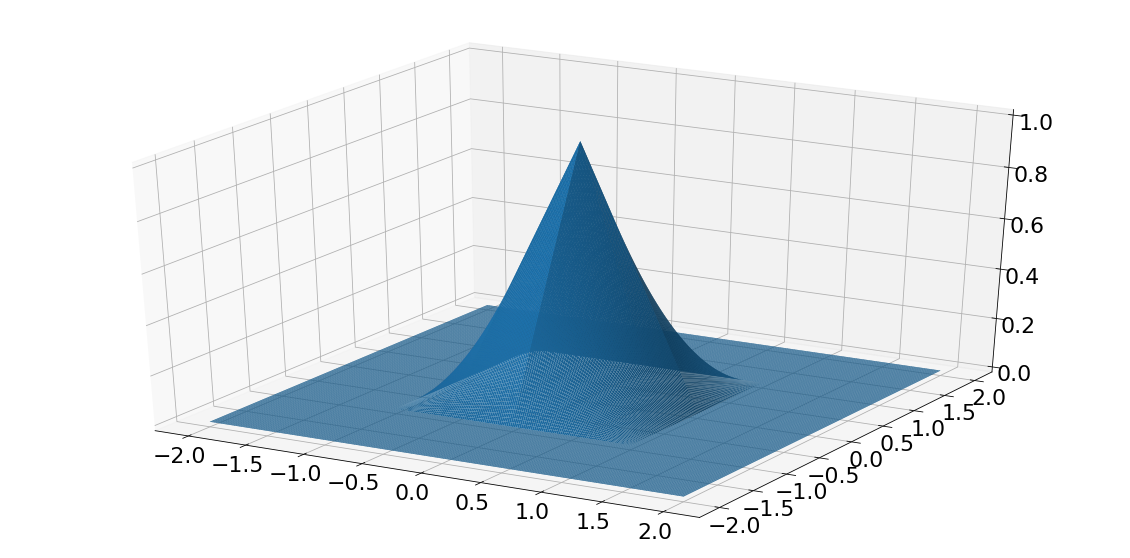

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]
pixel=np.zeros((128,128))
pixel[(64-32):(64+32),(64-32):(64+32)]=1
sampFun=signal.convolve2d(pixel,pixel)
sampFun=sampFun/np.max(sampFun)
fig=plt.figure()

ax = plt.gca(projection='3d')

X, Y = np.meshgrid(np.linspace(-2,2,255), np.linspace(-2,2,255))


surf = ax.plot_surface(X, Y, sampFun, rstride=1, cstride=1, antialiased=True, linewidth=0)

In [3]:
def qres(p):
  #function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr

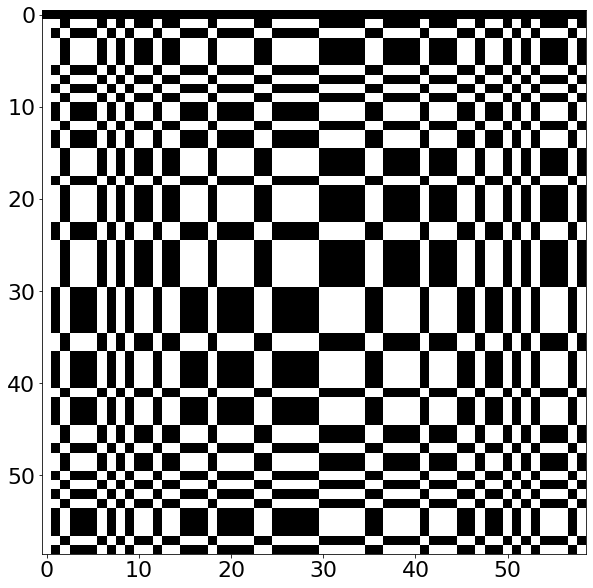

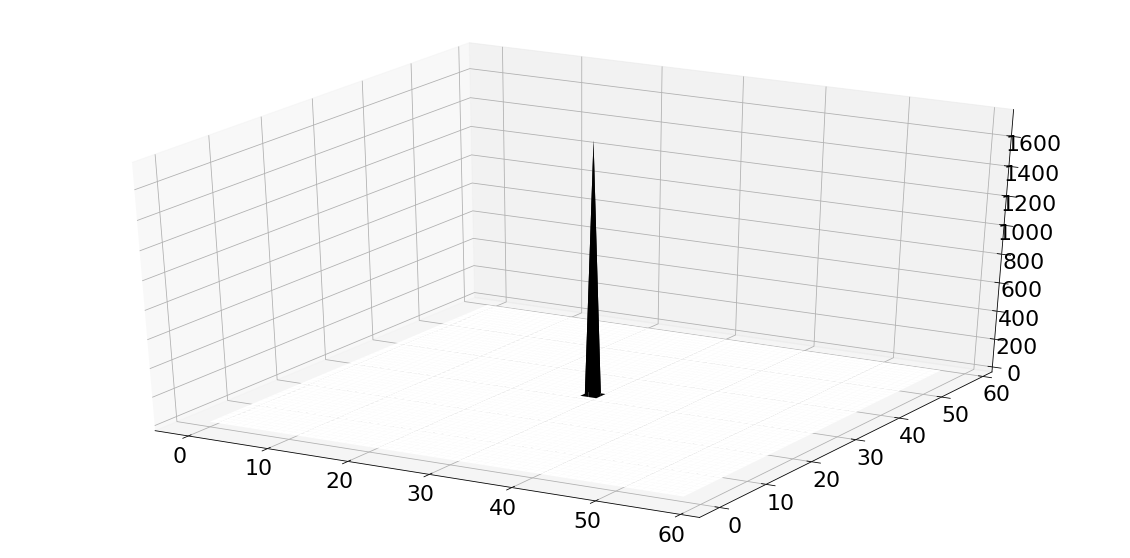

In [4]:
p=59
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');
#plt.subplot(1,2,1);
plt.imshow(t,cmap='gray');
#plt.title('Base aperture pattern')
#plt.subplot(1,2,2);
#plt.imshow(tt, cmap='gray');
#plt.title('Tiled aperture pattern')
#plt.savefig('muraCodedAperture31.pdf')
#files.download('muraCodedAperture31.pdf')
fig=plt.figure()

ax = plt.gca(projection='3d')

X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))


surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')

In [5]:
# load the mnist dataset of characters


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

11501568/11490434 [==============================] - 0s 0us/step


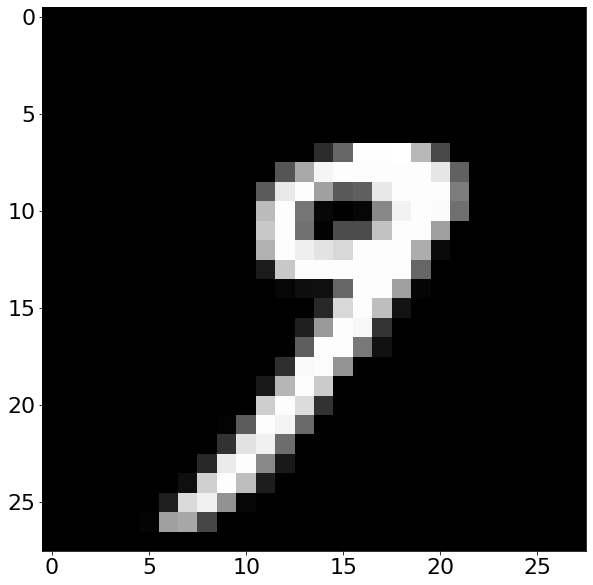

In [ ]:
plt.imshow(x_train[33],cmap='gray')

(-0.5, 58.5, 58.5, -0.5)

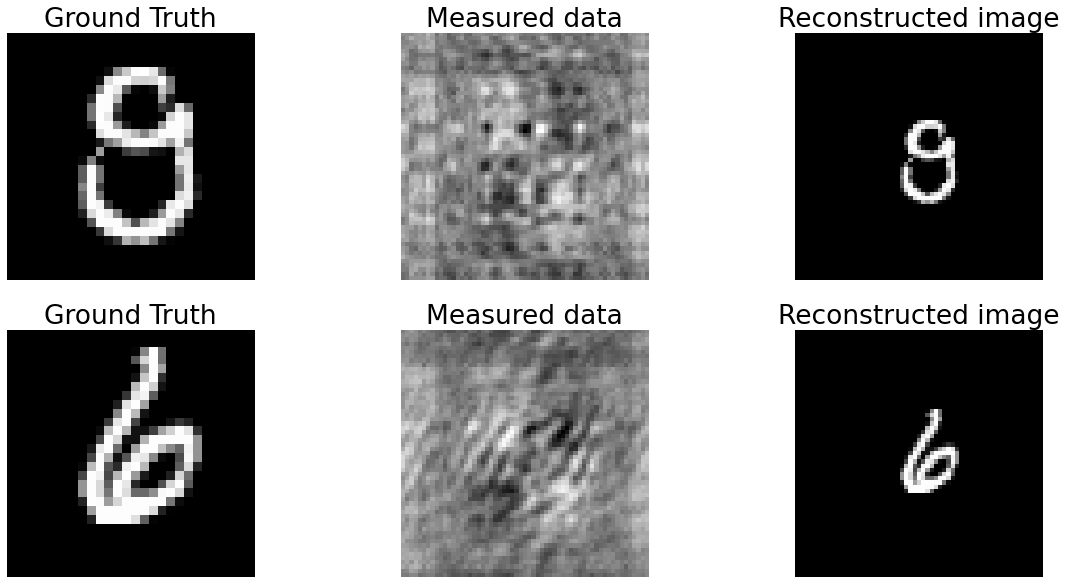

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[80];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[73];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

#plt.savefig('muraCodedApertureReconNoNoise.pdf')
#files.download('muraCodedApertureReconNoNoise.pdf')

In [ ]:
imagey.shape, fe.shape

((28, 28), (59, 59))

Reconstructed image is now 59,59 becuase of the coded aperature size of 59 by 59.

In [ ]:
x_train.shape

(60000, 28, 28)

(-0.5, 58.5, 58.5, -0.5)

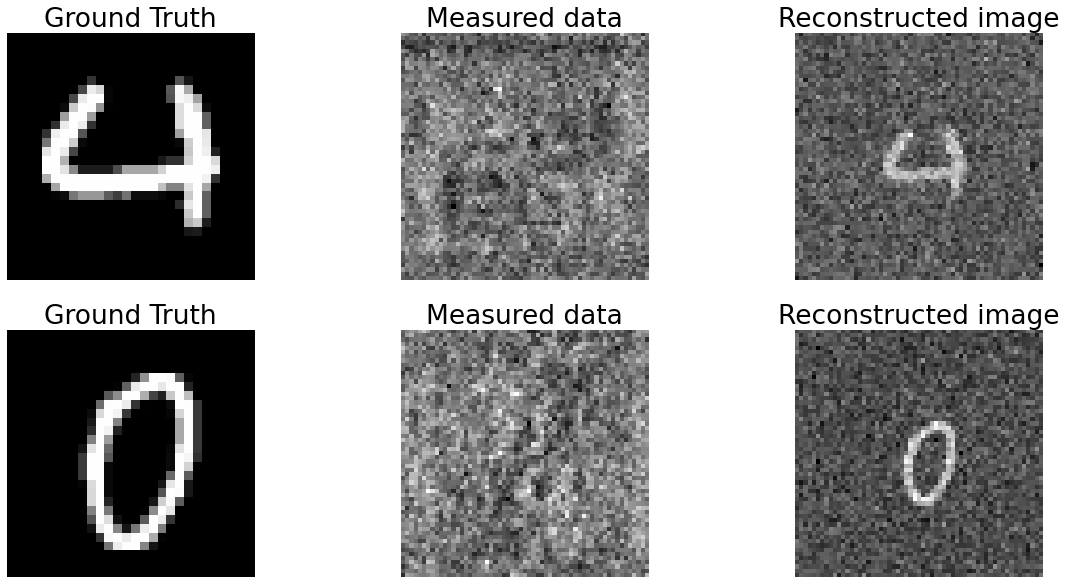

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[60];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[1000];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noiseplt.savefig('muraCodedApertureReconShotNoise.pdf')
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

(-0.5, 58.5, 58.5, -0.5)

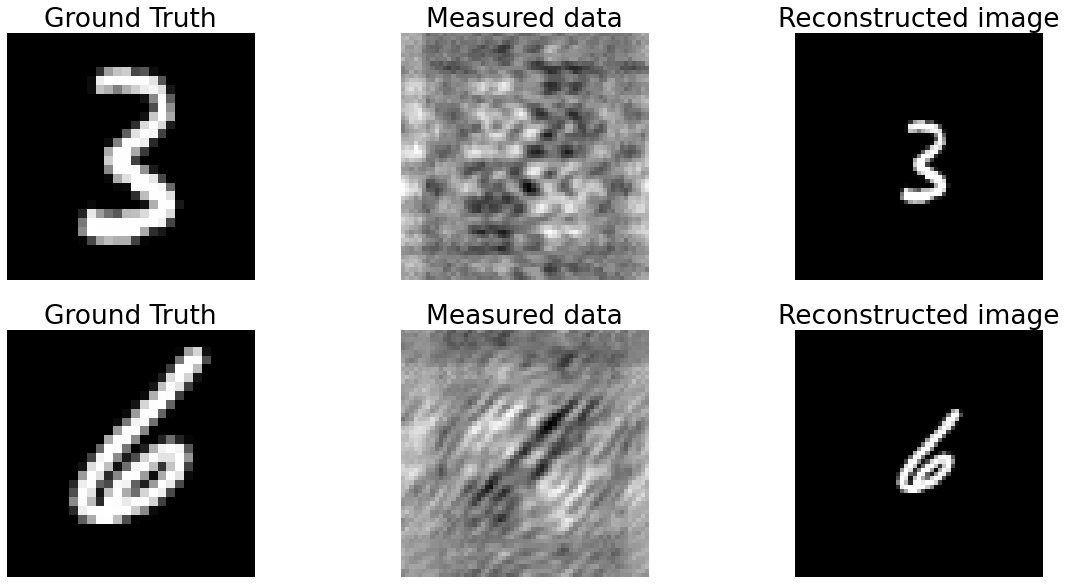

In [10]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[50000];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[999];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

Now with Poisson noise.

(-0.5, 58.5, 58.5, -0.5)

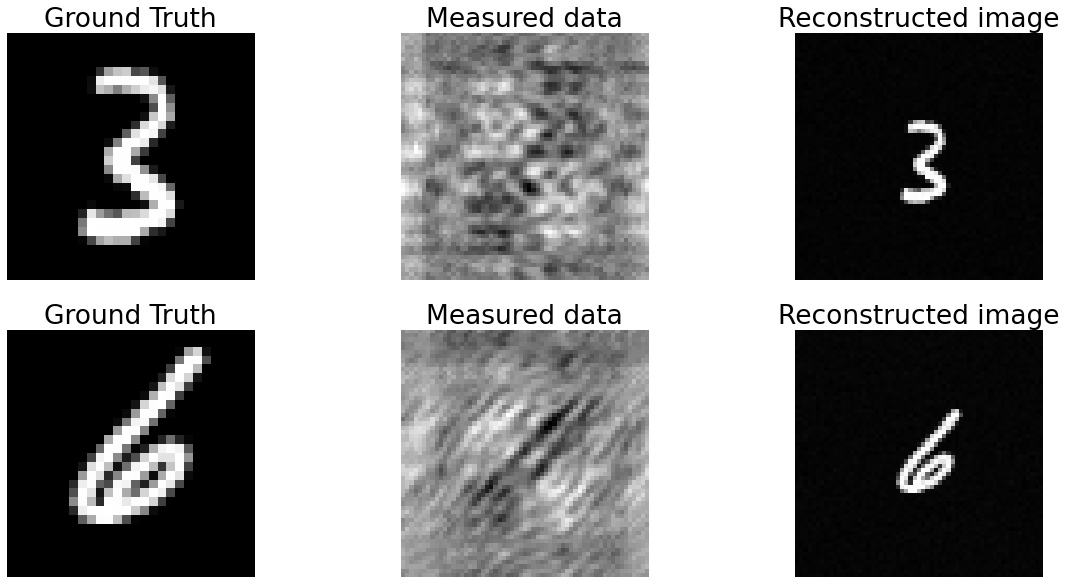

In [12]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[50000];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[999];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

And with Gaussian noise.

(-0.5, 58.5, 58.5, -0.5)

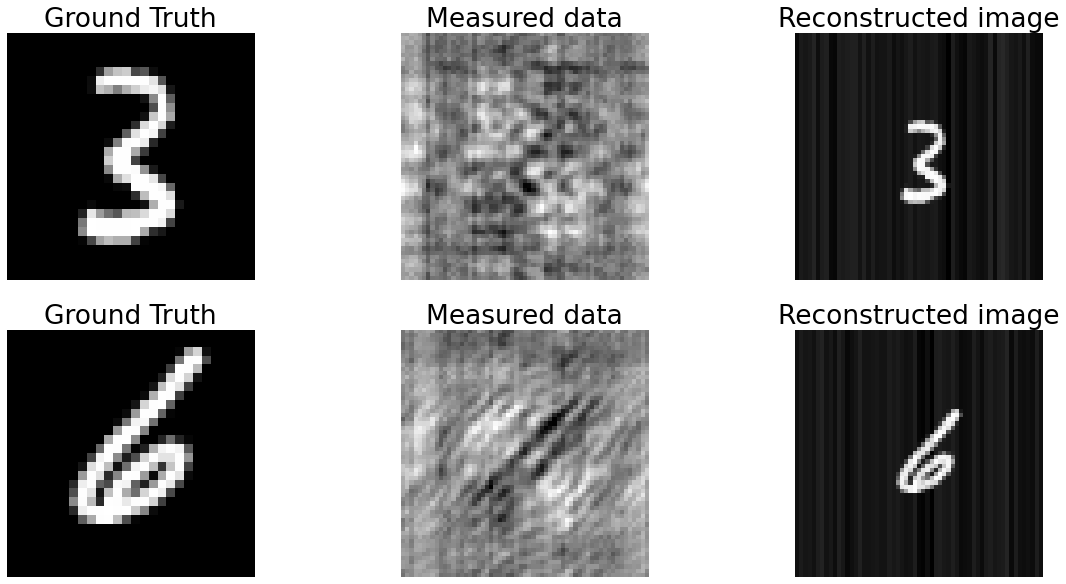

In [14]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[50000];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');

noise=np.random.normal(0,1,59)
g=g+noise
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[999];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');

noise=np.random.normal(0,1,59)
g=g+noise
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

Again with different numbers.

(-0.5, 58.5, 58.5, -0.5)

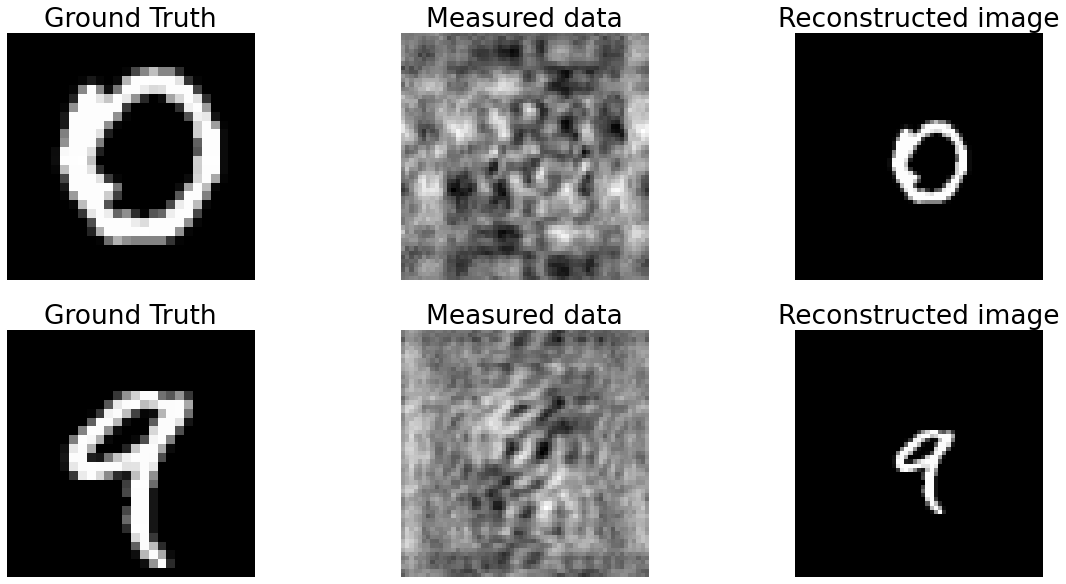

In [15]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[4444];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[4];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

(-0.5, 58.5, 58.5, -0.5)

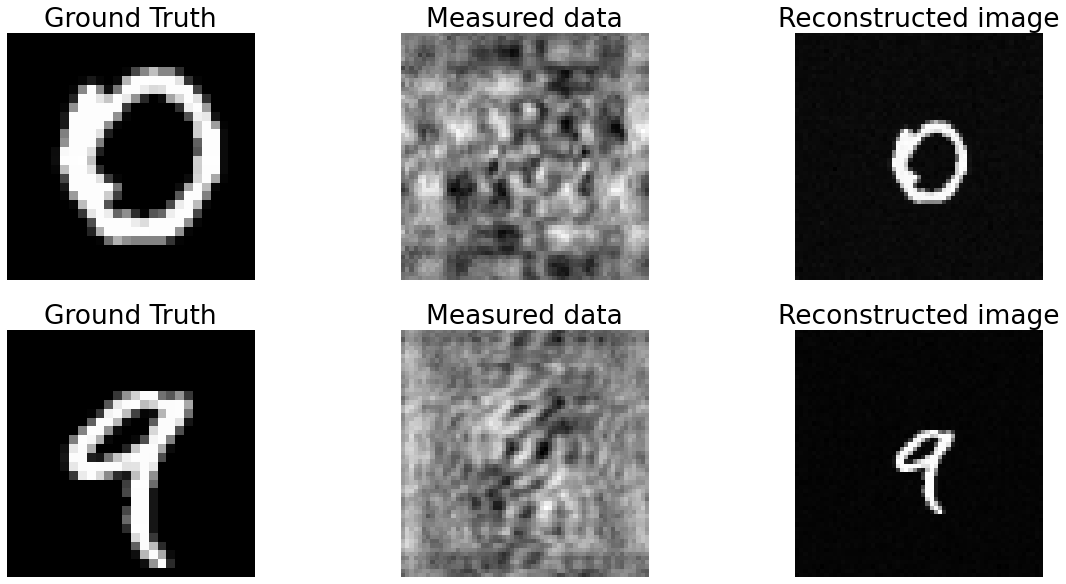

In [17]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[4444];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[4];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100000
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

(-0.5, 58.5, 58.5, -0.5)

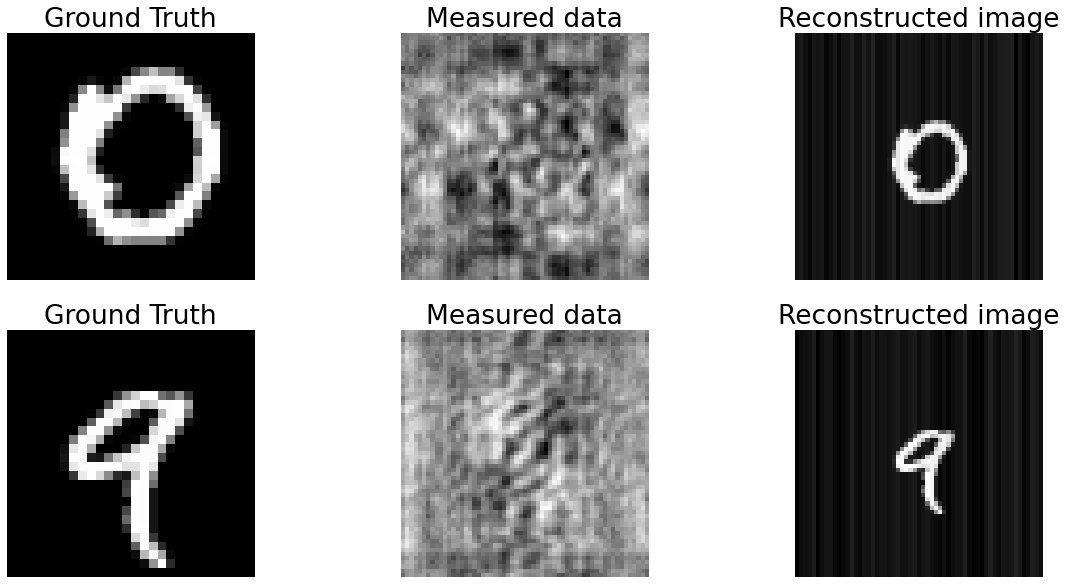

In [19]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[4444];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise

noise=np.random.normal(0,1,59)
g=g+noise
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[4];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise

noise=np.random.normal(0,1,59)
g=g+noise
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
fe=fe/cp.max()
#divide by the area of the delta function to get rid of the added amplitude
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

No reason to expect a change. The reconstruction is great with no noise and with Poisson noise. The background looks horrible with gaussian noise in the reconstruction but considering the state of the measured data it is more than ecceptable. However, if the noise became too much the letter could be lost in the reconstruction. 

#Problem 2

Implement neural denoising of the system that you built in 1. To complete 1 you will need to scale images to work well with the 59 element code. You  may need to rescale images to match parameters of your neural denoising system. ***Try several different neural processing models (e.g. different numbers of layers, add drop layers, max pooling layers). Look for classes of images that perform well or not well in the neural denoiser. ***

In [20]:
# load the mnist dataset of characters
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_test[pop,:,:], mode='same',boundary='wrap'))\
                                               ,mode='same',boundary='wrap'),dsize=(28,28))
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_train[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(28,28))
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
g_train = np.reshape(g_train, (len(g_train), 28, 28, 1))
g_test = np.reshape(g_test, (len(g_test), 28, 28, 1))

KeyboardInterrupt: ignored

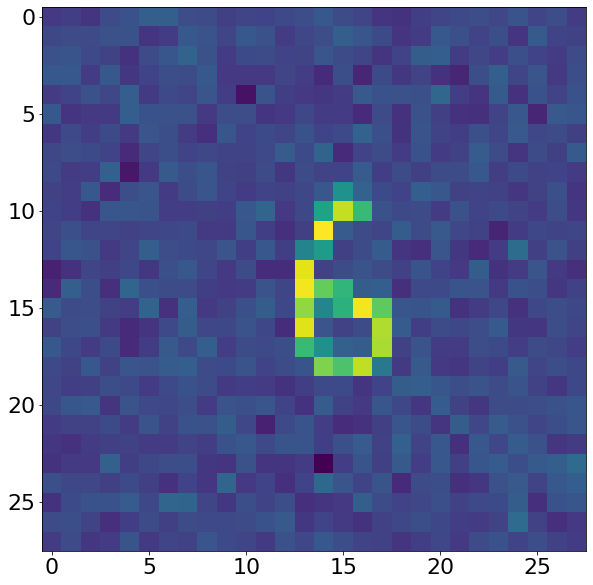

In [ ]:
plt.imshow(g_test[3000].reshape(28, 28))

https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
469/469 [==============================] - 15s 8ms/step - loss: 0.2154 - val_loss: 0.1525
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1404 - val_loss: 0.1303
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1255 - val_loss: 0.1191
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1177 - val_loss: 0.1132
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1129 - val_loss: 0.1105
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1094 - val_loss: 0.1062
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1067 - val_loss: 0.1040
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1047 - val_loss: 0.1029
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1030 - val_loss: 0.1015
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1017 - val_loss: 0.099

In [22]:
!wget --no-check-certificate --content-disposition https://github.com/Gord123098/hwk3_556/raw/main/mnistDenoiser.tar.gz
!tar -xzvf mnistDenoiser.tar.gz

--2022-10-12 06:31:29--  https://github.com/Gord123098/hwk3_556/raw/main/mnistDenoiser.tar.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Gord123098/hwk3_556/main/mnistDenoiser.tar.gz [following]
--2022-10-12 06:31:29--  https://raw.githubusercontent.com/Gord123098/hwk3_556/main/mnistDenoiser.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334046 (326K) [application/octet-stream]
Saving to: ‘mnistDenoiser.tar.gz’

mnistDenoiser.tar.g 100%[===================>] 326.22K  --.-KB/s    in 0.006s  

2022-10-12 06:31:30 (52.5 MB/s) - ‘mnistDenoiser.tar.gz’ saved [334046/334046]

mnistDen

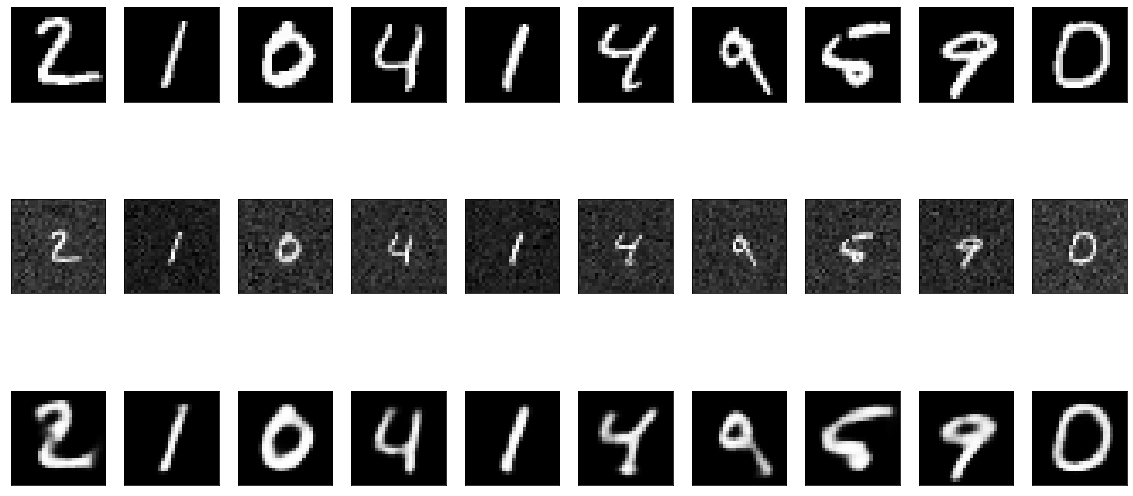

In [ ]:
n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

The reconstruction looks prety good for all of the numbers. They are all atleast readable.

In [ ]:
!rm -r mistDenoiser/
autoencoder.save("mnistDenoiser")
!tar -czvf mnistDenoiser.tar.gz mnistDenoiser/
files.download('mnistDenoiser.tar.gz')

rm: cannot remove 'mistDenoiser/': No such file or directory
mnistDenoiser/
mnistDenoiser/keras_metadata.pb
mnistDenoiser/variables/
mnistDenoiser/variables/variables.data-00000-of-00001
mnistDenoiser/variables/variables.index
mnistDenoiser/saved_model.pb
mnistDenoiser/assets/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
#Drop the upsampling
#x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

In [ ]:
n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

#Problem 3

***Test and compare neural reconstruction from sparse radon data for several different neural architectures. Make a report analyzing the performance of systems presented in https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/rays/projectionTomography.ipynb, see if you can improve on the results presented there.***

In [ ]:
from keras.datasets import mnist
# load the mnist dataset of characters
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

11501568/11490434 [==============================] - 0s 0us/step


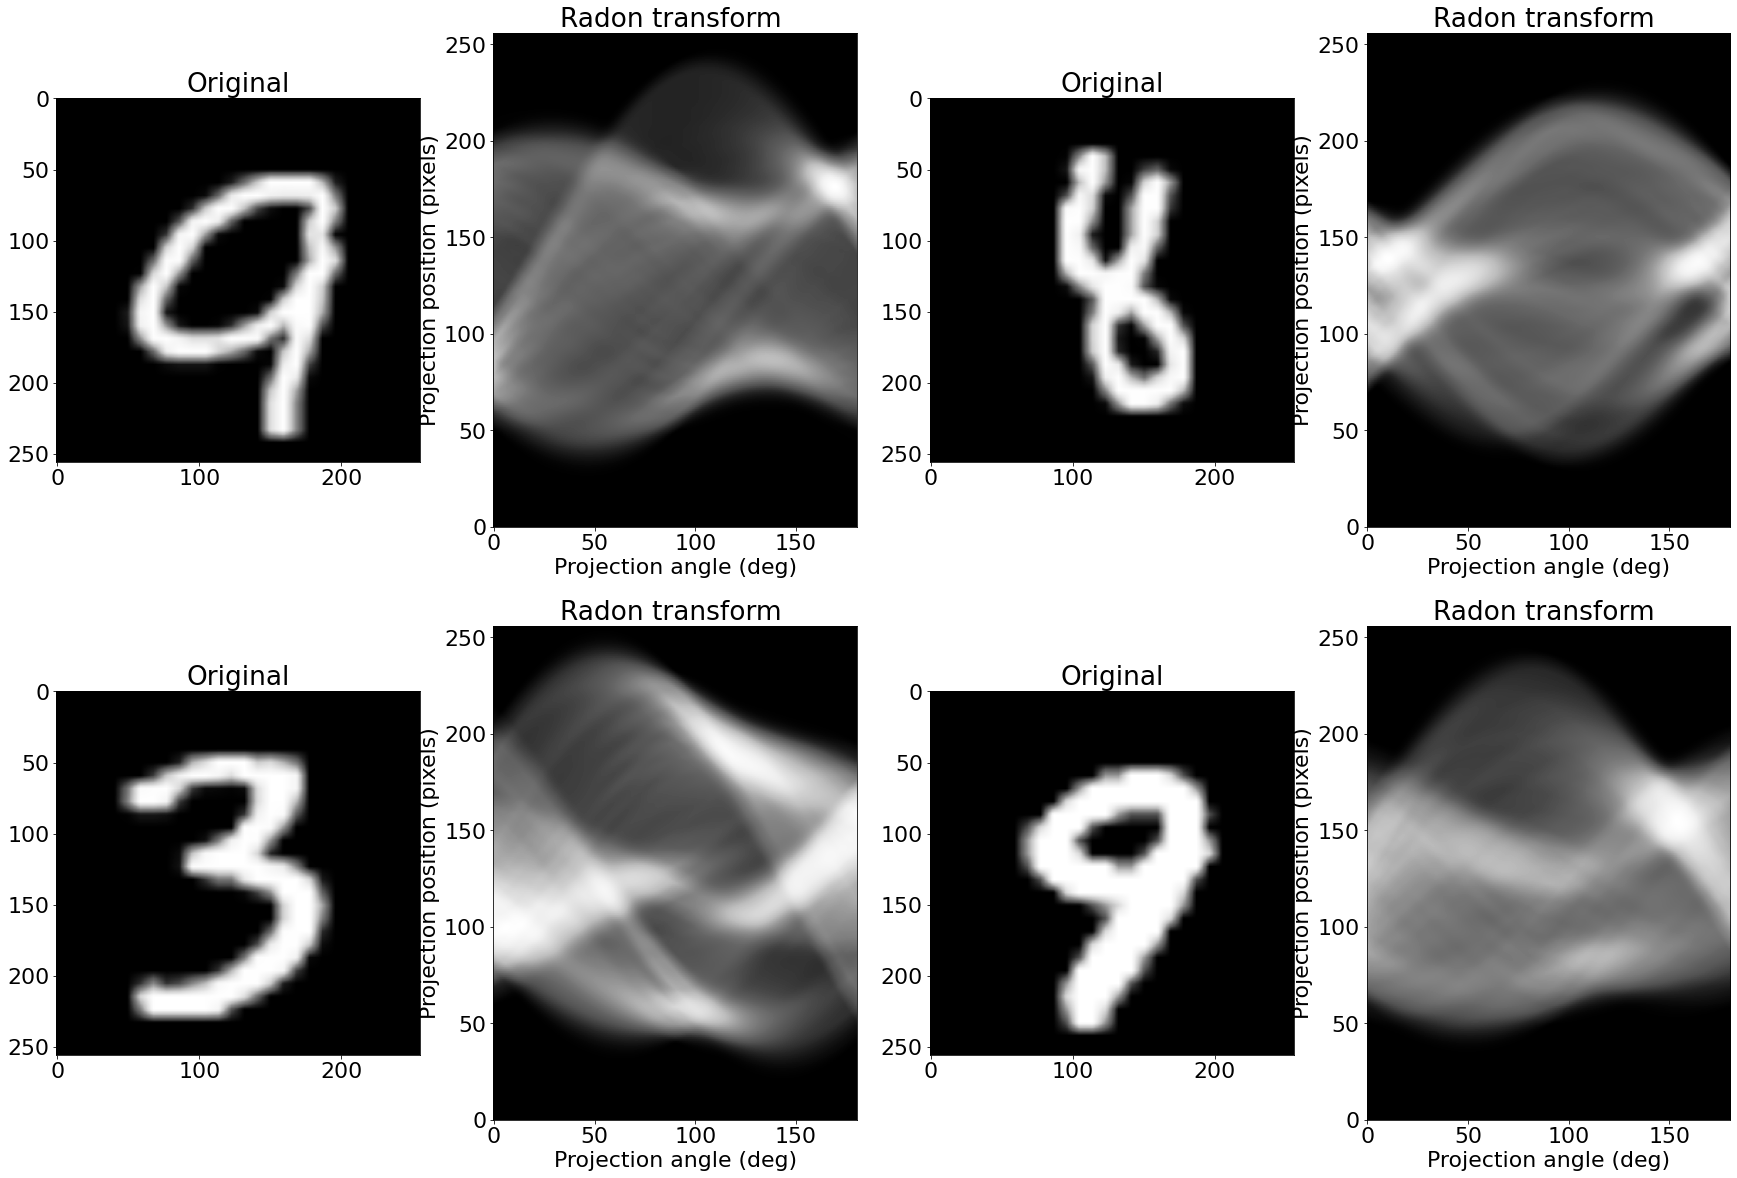

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(30, 20))
nP=256
image=x_train[3000,:,:]
image = resize(image, (nP,nP), mode='edge')
ax[0,0].set_title("Original")
ax[0,0].imshow(image, cmap=plt.cm.Greys_r)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax[0,1].set_title("Radon transform ")
ax[0,1].set_xlabel("Projection angle (deg)")
ax[0,1].set_ylabel("Projection position (pixels)")
ax[0,1].imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
image=x_train[7000,:,:]
image = resize(image, (nP,nP), mode='edge')
ax[0,2].set_title("Original")
ax[0,2].imshow(image, cmap=plt.cm.Greys_r)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax[0,3].set_title("Radon transform ")
ax[0,3].set_xlabel("Projection angle (deg)")
ax[0,3].set_ylabel("Projection position (pixels)")
ax[0,3].imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
image=x_train[10000,:,:]
image = resize(image, (nP,nP), mode='edge')
ax[1,0].set_title("Original")
ax[1,0].imshow(image, cmap=plt.cm.Greys_r)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax[1,1].set_title("Radon transform ")
ax[1,1].set_xlabel("Projection angle (deg)")
ax[1,1].set_ylabel("Projection position (pixels)")
ax[1,1].imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')
image=x_train[5999,:,:]
image = resize(image, (nP,nP), mode='edge')
ax[1,2].set_title("Original")
ax[1,2].imshow(image, cmap=plt.cm.Greys_r)
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax[1,3].set_title("Radon transform ")
ax[1,3].set_xlabel("Projection angle (deg)")
ax[1,3].set_ylabel("Projection position (pixels)")
ax[1,3].imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

In [ ]:
#modify iradon
from scipy.interpolate import interp1d
from scipy.constants import golden_ratio
from skimage.transform._warps import warp
from skimage.transform._radon_transform import sart_projection_update
from skimage._shared.fft import fftmodule
from skimage._shared.utils import  convert_to_float
from warnings import warn
from functools import partial

if fftmodule is np.fft:
    # fallback from scipy.fft to scipy.fftpack instead of numpy.fft
    # (fftpack preserves single precision while numpy.fft does not)
    from scipy.fftpack import fft, ifft
else:
    fft = fftmodule.fft
    ifft = fftmodule.ifft
    
def iradon(radon_image, theta=None, output_size=None,
           filter_name="ramp", interpolation="linear", circle=True,
           preserve_range=True):
    """Inverse radon transform.

    Reconstruct an image from the radon transform, using the filtered
    back projection algorithm.

    Parameters
    ----------
    radon_image : array
        Image containing radon transform (sinogram). Each column of
        the image corresponds to a projection along a different
        angle. The tomography rotation axis should lie at the pixel
        index ``radon_image.shape[0] // 2`` along the 0th dimension of
        ``radon_image``.
    theta : array_like, optional
        Reconstruction angles (in degrees). Default: m angles evenly spaced
        between 0 and 180 (if the shape of `radon_image` is (N, M)).
    output_size : int, optional
        Number of rows and columns in the reconstruction.
    filter_name : str, optional
        Filter used in frequency domain filtering. Ramp filter used by default.
        Filters available: ramp, shepp-logan, cosine, hamming, hann.
        Assign None to use no filter.
    interpolation : str, optional
        Interpolation method used in reconstruction. Methods available:
        'linear', 'nearest', and 'cubic' ('cubic' is slow).
    circle : boolean, optional
        Assume the reconstructed image is zero outside the inscribed circle.
        Also changes the default output_size to match the behaviour of
        ``radon`` called with ``circle=True``.
    preserve_range : bool, optional
        Whether to keep the original range of values. Otherwise, the input
        image is converted according to the conventions of `img_as_float`.
        Also see https://scikit-image.org/docs/dev/user_guide/data_types.html

    Returns
    -------
    reconstructed : ndarray
        Reconstructed image. The rotation axis will be located in the pixel
        with indices
        ``(reconstructed.shape[0] // 2, reconstructed.shape[1] // 2)``.

    .. versionchanged :: 0.19
        In ``iradon``, ``filter`` argument is deprecated in favor of
        ``filter_name``.

    References
    ----------
    .. [1] AC Kak, M Slaney, "Principles of Computerized Tomographic
           Imaging", IEEE Press 1988.
    .. [2] B.R. Ramesh, N. Srinivasa, K. Rajgopal, "An Algorithm for Computing
           the Discrete Radon Transform With Some Applications", Proceedings of
           the Fourth IEEE Region 10 International Conference, TENCON '89, 1989

    Notes
    -----
    It applies the Fourier slice theorem to reconstruct an image by
    multiplying the frequency domain of the filter with the FFT of the
    projection data. This algorithm is called filtered back projection.

    """
    if radon_image.ndim != 2:
        raise ValueError('The input image must be 2-D')

    if theta is None:
        theta = np.linspace(0, 180, radon_image.shape[1], endpoint=False)

    angles_count = len(theta)
    if angles_count != radon_image.shape[1]:
        raise ValueError("The given ``theta`` does not match the number of "
                         "projections in ``radon_image``.")

    interpolation_types = ('linear', 'nearest', 'cubic')
    if interpolation not in interpolation_types:
        raise ValueError("Unknown interpolation: %s" % interpolation)

    filter_types = ('ramp', 'shepp-logan', 'cosine', 'hamming', 'hann', None)
    if filter_name not in filter_types:
        raise ValueError("Unknown filter: %s" % filter_name)

    radon_image = convert_to_float(radon_image, preserve_range)
    dtype = radon_image.dtype

    img_shape = radon_image.shape[0]
    if output_size is None:
        # If output size not specified, estimate from input radon image
        if circle:
            output_size = img_shape
        else:
            output_size = int(np.floor(np.sqrt((img_shape) ** 2 / 2.0)))

    if circle:
        radon_image = _sinogram_circle_to_square(radon_image)
        img_shape = radon_image.shape[0]

    # Resize image to next power of two (but no less than 64) for
    # Fourier analysis; speeds up Fourier and lessens artifacts
    projection_size_padded = max(64, int(2 ** np.ceil(np.log2(2 * img_shape))))
    pad_width = ((0, projection_size_padded - img_shape), (0, 0))
    img = np.pad(radon_image, pad_width, mode='constant', constant_values=0)

    # Apply filter in Fourier domain
    fourier_filter = _get_fourier_filter(projection_size_padded, filter_name)
    projection = fft(img, axis=0) * fourier_filter
    radon_filtered = np.real(ifft(projection, axis=0)[:img_shape, :])

    # Reconstruct image by interpolation
    reconstructed = np.zeros((output_size, output_size),
                             dtype=dtype)
    radius = output_size // 2
    xpr, ypr = np.mgrid[:output_size, :output_size] - radius
    x = np.arange(img_shape) - img_shape // 2

    for col, angle in zip(radon_filtered.T, np.deg2rad(theta)):
        t = ypr * np.cos(angle) - xpr * np.sin(angle)
        if interpolation == 'linear':
            interpolant = partial(np.interp, xp=x, fp=col, left=0, right=0)
        else:
            interpolant = interp1d(x, col, kind=interpolation,
                                   bounds_error=False, fill_value=0)
        reconstructed += interpolant(t)

    if circle:
        out_reconstruction_circle = (xpr ** 2 + ypr ** 2) > radius ** 2
        reconstructed[out_reconstruction_circle] = 0.

    return reconstructed * np.pi / (2 * angles_count), projection
def _sinogram_circle_to_square(sinogram):
    diagonal = int(np.ceil(np.sqrt(2) * sinogram.shape[0]))
    pad = diagonal - sinogram.shape[0]
    old_center = sinogram.shape[0] // 2
    new_center = diagonal // 2
    pad_before = new_center - old_center
    pad_width = ((pad_before, pad - pad_before), (0, 0))
    return np.pad(sinogram, pad_width, mode='constant', constant_values=0)
def _get_fourier_filter(size, filter_name):
    """Construct the Fourier filter.

    This computation lessens artifacts and removes a small bias as
    explained in [1], Chap 3. Equation 61.

    Parameters
    ----------
    size : int
        filter size. Must be even.
    filter_name : str
        Filter used in frequency domain filtering. Filters available:
        ramp, shepp-logan, cosine, hamming, hann. Assign None to use
        no filter.

    Returns
    -------
    fourier_filter: ndarray
        The computed Fourier filter.

    References
    ----------
    .. [1] AC Kak, M Slaney, "Principles of Computerized Tomographic
           Imaging", IEEE Press 1988.

    """
    n = np.concatenate((np.arange(1, size / 2 + 1, 2, dtype=int),
                        np.arange(size / 2 - 1, 0, -2, dtype=int)))
    f = np.zeros(size)
    f[0] = 0.25
    f[1::2] = -1 / (np.pi * n) ** 2

    # Computing the ramp filter from the fourier transform of its
    # frequency domain representation lessens artifacts and removes a
    # small bias as explained in [1], Chap 3. Equation 61
    fourier_filter = 2 * np.real(fft(f))         # ramp filter
    if filter_name == "ramp":
        pass
    elif filter_name == "shepp-logan":
        # Start from first element to avoid divide by zero
        omega = np.pi * fftmodule.fftfreq(size)[1:]
        fourier_filter[1:] *= np.sin(omega) / omega
    elif filter_name == "cosine":
        freq = np.linspace(0, np.pi, size, endpoint=False)
        cosine_filter = fftmodule.fftshift(np.sin(freq))
        fourier_filter *= cosine_filter
    elif filter_name == "hamming":
        fourier_filter *= fftmodule.fftshift(np.hamming(size))
    elif filter_name == "hann":
        fourier_filter *= fftmodule.fftshift(np.hanning(size))
    elif filter_name is None:
        fourier_filter[:] = 1

    return fourier_filter[:, np.newaxis]

Text(0.5, 1.0, '(d)')

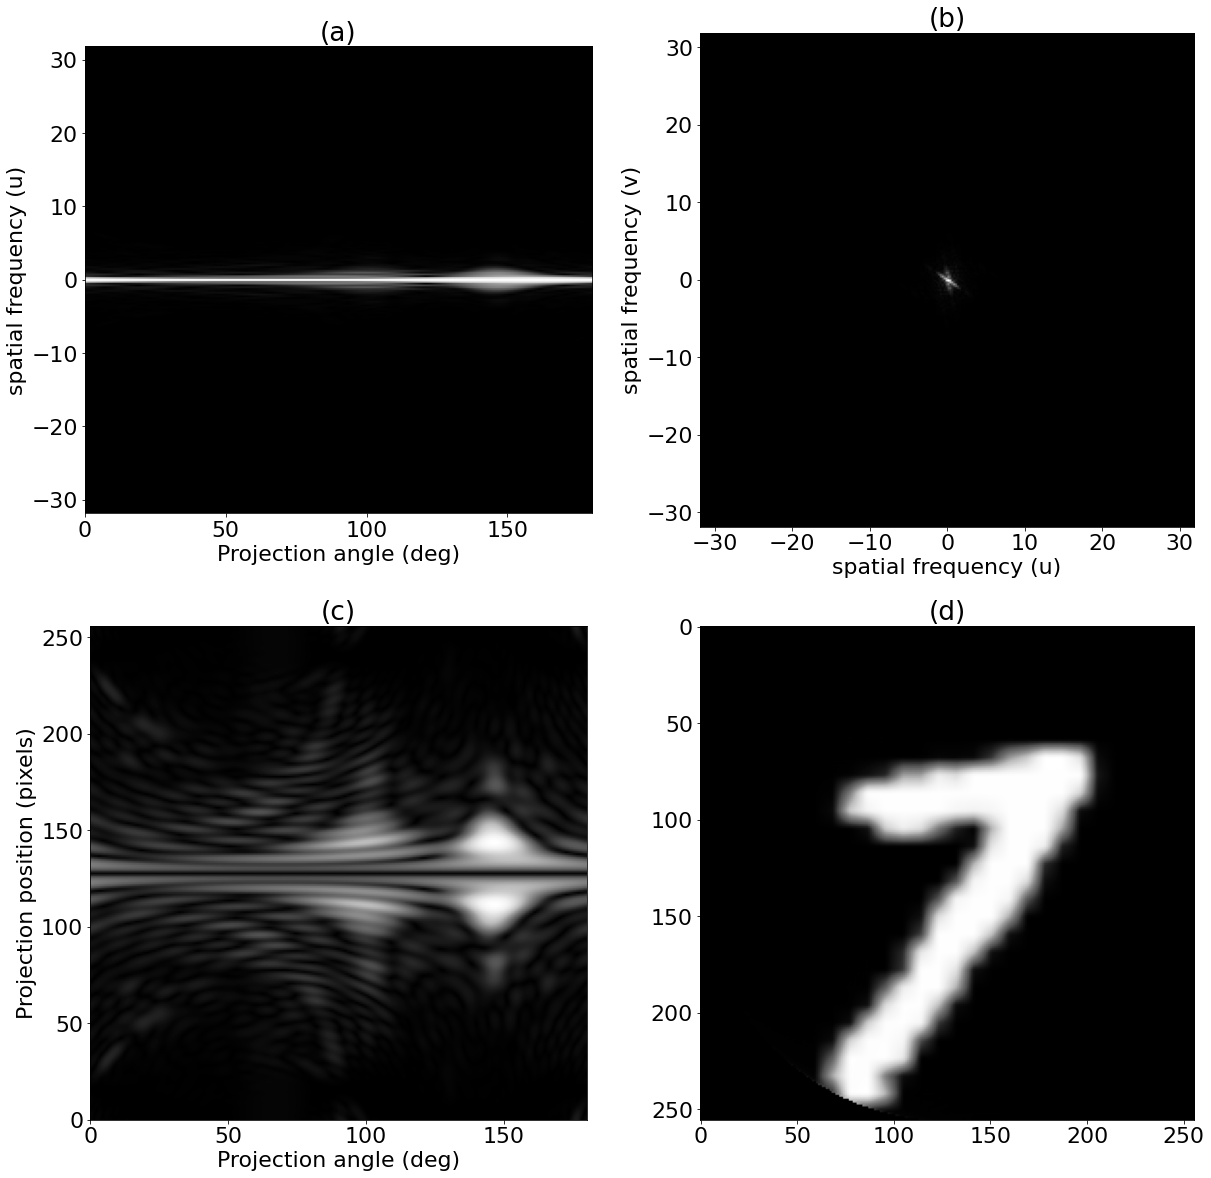

In [ ]:
xMax=2;
nP=256;
xStep=2*xMax/(nP-1);
uMax=1/(2*xStep);uStep=2*uMax/(nP-1);
urange=np.linspace(-uMax,uMax,nP);
xrange=np.linspace(-xMax,xMax,nP);
thetaRange=np.arange(0,180,.5);
[x,y]=np.meshgrid(xrange,xrange);
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
image=x_train[40000,:,:]
image = resize(image, (nP,nP), mode='edge')
rTf1=radon(image,thetaRange);
ftR=np.fft.fftshift(np.fft.fft(np.fft.fftshift(rTf1,axes=0),axis=0),axes=0);
ax[0,0].imshow(np.abs(ftR), cmap=plt.cm.Greys_r, extent = (0 , 180,-uMax  ,uMax) );
ax[0,0].set_title('(a)')
ax[0,0].set_xlabel("Projection angle (deg)")
ax[0,0].set_ylabel("spatial frequency (u)")
ax[0,0].set_aspect(2.6)
ax[0,1].imshow(abs(np.fft.fftshift(np.fft.fft2(image))),cmap=plt.cm.Greys_r,extent = (-uMax,uMax,-uMax,uMax));
ax[0,1].set_title('(b)')
ax[0,1].set_aspect('equal')
ax[0,1].set_xlabel("spatial frequency (u)")
ax[0,1].set_ylabel("spatial frequency (v)")
[recon, Q]= iradon(rTf1,theta=thetaRange)
ax[1,0].imshow(np.abs(np.fft.fftshift(Q,axes=0))[(512-128):(512+128),:],cmap=plt.cm.Greys_r,extent=[0 , 180, 0  ,256]);
ax[1,0].set_aspect(.7)
ax[1,0].set_title('(c)')
ax[1,0].set_xlabel("Projection angle (deg)")
ax[1,0].set_ylabel("Projection position (pixels)")
ax[1,1].imshow(recon,cmap=plt.cm.Greys_r);
ax[1,1].set_title('(d)')

SART (1 iteration) rms reconstruction error: 0.181
SART (1 iteration) rms reconstruction error: 0.155


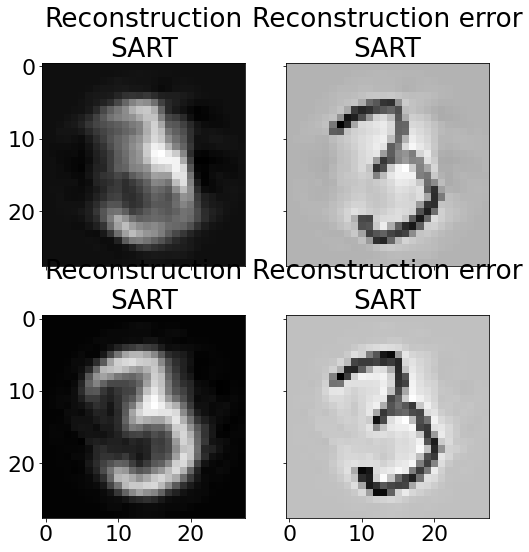

In [ ]:
ntheta=10;
image=x_train[30000,:,:]
thetaVals=np.random.choice(360,ntheta,replace=False)/2.
sinogram=radon(image,thetaVals);
reconstruction_sart = iradon_sart(sinogram, theta=thetaVals)
error = reconstruction_sart - image
print("SART (1 iteration) rms reconstruction error: "
      f"{np.sqrt(np.mean(error**2)):.3g}")

fig, axes = plt.subplots(2, 2, figsize=(8, 8.5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title("Reconstruction\nSART")
ax[0].imshow(reconstruction_sart, cmap=plt.cm.Greys_r)

ax[1].set_title("Reconstruction error\nSART")
ax[1].imshow(reconstruction_sart - image, cmap=plt.cm.Greys_r)
# no try with regularly spaced samples
thetaVals=np.linspace(0,180,ntheta)
sinogram=radon(image,thetaVals);
reconstruction_sart = iradon_sart(sinogram, theta=thetaVals)
error = reconstruction_sart - image
print("SART (1 iteration) rms reconstruction error: "
      f"{np.sqrt(np.mean(error**2)):.3g}")

ax[2].set_title("Reconstruction\nSART")
ax[2].imshow(reconstruction_sart, cmap=plt.cm.Greys_r)

ax[3].set_title("Reconstruction error\nSART")
ax[3].imshow(reconstruction_sart - image, cmap=plt.cm.Greys_r)

In [ ]:
ntheta=20;
# randomly spaced values of theta
thetaVals=np.random.choice(360,ntheta,replace=False)/2.


(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
# image padding to full radon data from all directions.
#
x_train =np.pad(x_train, ((0,0),(18,18),(18,18)), 'constant')
x_test =np.pad(x_test, ((0,0),(18,18),(18,18)), 'constant')

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]= iradon_sart(radon(x_test[pop,:,:],thetaVals), theta=thetaVals)
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=iradon_sart(radon(x_train[pop,:,:],thetaVals), theta=thetaVals)
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
g_train = np.reshape(g_train, (len(g_train), 64, 64, 1))
g_test = np.reshape(g_test, (len(g_test), 64, 64, 1))

In [ ]:
plt.imshow(g_test[6000].reshape(64, 64))
print(np.max(g_test[6000]))

In [ ]:
inputs=keras.Input(shape=(64, 64, 1))

# Encoder
x = layers.Conv2D(32, (5, 5), strides=1, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, (4, 4), strides=2, activation="relu", padding="same")(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(1, (3, 3), activation="linear", padding="same")(x)

autoencoder = keras.Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        16416     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 64, 64, 32)       18464     
 ranspose)                                                   

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
469/469 [==============================] - 42s 64ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 2/10
469/469 [==============================] - 30s 63ms/step - loss: 0.0011 - val_loss: 9.3001e-04
Epoch 3/10
469/469 [==============================] - 30s 64ms/step - loss: 8.2703e-04 - val_loss: 7.2525e-04
Epoch 4/10
469/469 [==============================] - 30s 64ms/step - loss: 6.8666e-04 - val_loss: 6.3063e-04
Epoch 5/10
469/469 [==============================] - 30s 64ms/step - loss: 6.0776e-04 - val_loss: 5.7827e-04
Epoch 6/10
469/469 [==============================] - 30s 64ms/step - loss: 5.4893e-04 - val_loss: 5.3413e-04
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 5.0431e-04 - val_loss: 4.6696e-04
Epoch 8/10
469/469 [==============================] - 30s 64ms/step - loss: 4.8161e-04 - val_loss: 4.4893e-04
Epoch 9/10
469/469 [==============================] - 30s 64ms/step - loss: 4.4781e-04 - val_loss: 4.1898e-04
Epoch 10/10
469/469 [=

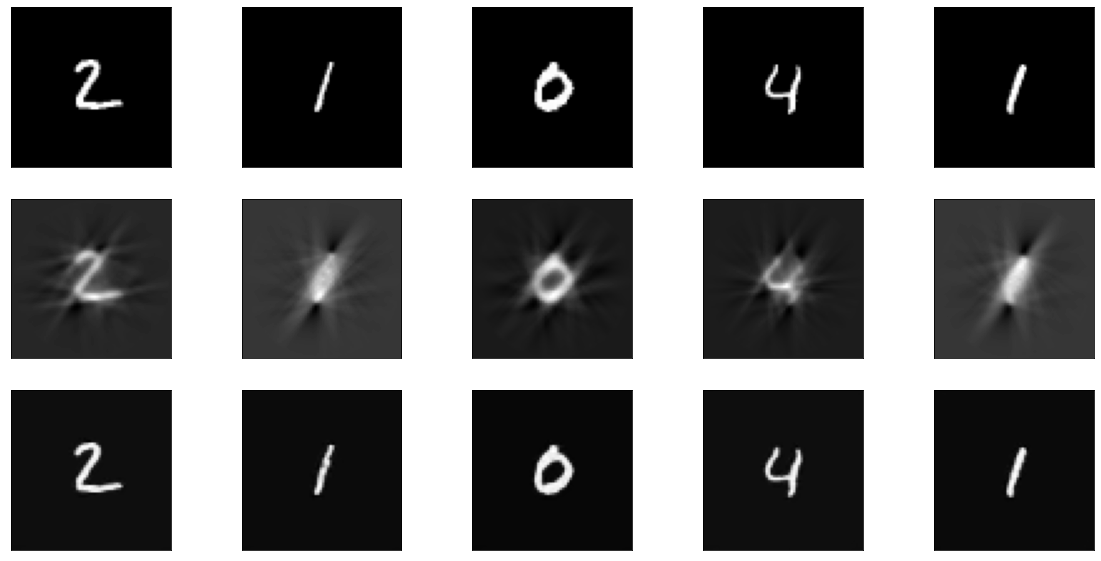

In [ ]:
n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:(i+1),:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
ntheta=20;
# randomly spaced values of theta
thetaVals=np.random.choice(360,ntheta,replace=False)/2.
#
# we are going to add poisson noise to the measurements. nPhoto is an gain factor for the intensity of the measured signal
#
nPhoto=1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
# image padding to full radon data from all directions.
#
x_train =np.pad(x_train, ((0,0),(18,18),(18,18)), 'constant')
x_test =np.pad(x_test, ((0,0),(18,18),(18,18)), 'constant')

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]= iradon_sart(28.*nPhoto-np.random.poisson(nPhoto*(28.-radon(x_test[pop,:,:],thetaVals))), theta=thetaVals)
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=iradon_sart(28.*nPhoto-np.random.poisson(nPhoto*(28.-radon(x_train[pop,:,:],thetaVals))), theta=thetaVals)
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
g_train = np.reshape(g_train, (len(g_train), 64, 64, 1))
g_test = np.reshape(g_test, (len(g_test), 64, 64, 1))

In [ ]:
nputs=keras.Input(shape=(64, 64, 1))

# Encoder
x = layers.Conv2D(32, (5, 5), strides=1, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, (4, 4), strides=2, activation="relu", padding="same")(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(1, (3, 3), activation="linear", padding="same")(x)

autoencoder = keras.Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

In [ ]:
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)

In [ ]:
n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(g_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, n+i)
    plt.imshow(autoencoder.predict(g_test[i:(i+1),:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
ntheta=20*9;
# randomly spaced values of theta
thetaVals=np.random.choice(360,ntheta,replace=False)/2.
#
# we are going to add poisson noise to the measurements. nPhoto is an gain factor for the intensity of the measured signal
#
nPhoto=1/9

(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
# image padding to full radon data from all directions.
#
x_train =np.pad(x_train, ((0,0),(18,18),(18,18)), 'constant')
x_test =np.pad(x_test, ((0,0),(18,18),(18,18)), 'constant')

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0


g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))
for pop in range(np.shape(x_test)[0]):
  g_test[pop,:,:]= iradon_sart(28.*nPhoto-np.random.poisson(nPhoto*(28.-radon(x_test[pop,:,:],thetaVals))), theta=thetaVals)
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])
for pop in range(np.shape(x_train)[0]):
  g_train[pop,:,:]=iradon_sart(28.*nPhoto-np.random.poisson(nPhoto*(28.-radon(x_train[pop,:,:],thetaVals))), theta=thetaVals)
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
g_train = np.reshape(g_train, (len(g_train), 64, 64, 1))
g_test = np.reshape(g_test, (len(g_test), 64, 64, 1))

In [ ]:
inputs=keras.Input(shape=(64, 64, 1))

# Encoder
x = layers.Conv2D(32, (5, 5), strides=1, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, (4, 4), strides=2, activation="relu", padding="same")(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)


# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(1, (3, 3), activation="linear", padding="same")(x)

autoencoder = keras.Model(inputs, x)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        16416     
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_transpose_26 (Conv2D  (None, 32, 32, 64)       36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 64, 64, 32)       18464     
 Transpose)                                                

In [ ]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/10
469/469 [==============================] - 49s 103ms/step - loss: 0.0111 - val_loss: 0.0093
Epoch 2/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0085 - val_loss: 0.0079
Epoch 3/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 4/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 5/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 6/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 7/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 8/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 9/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 10/10
469/469 [==============================] - 35s 75ms/step - loss: 0.00

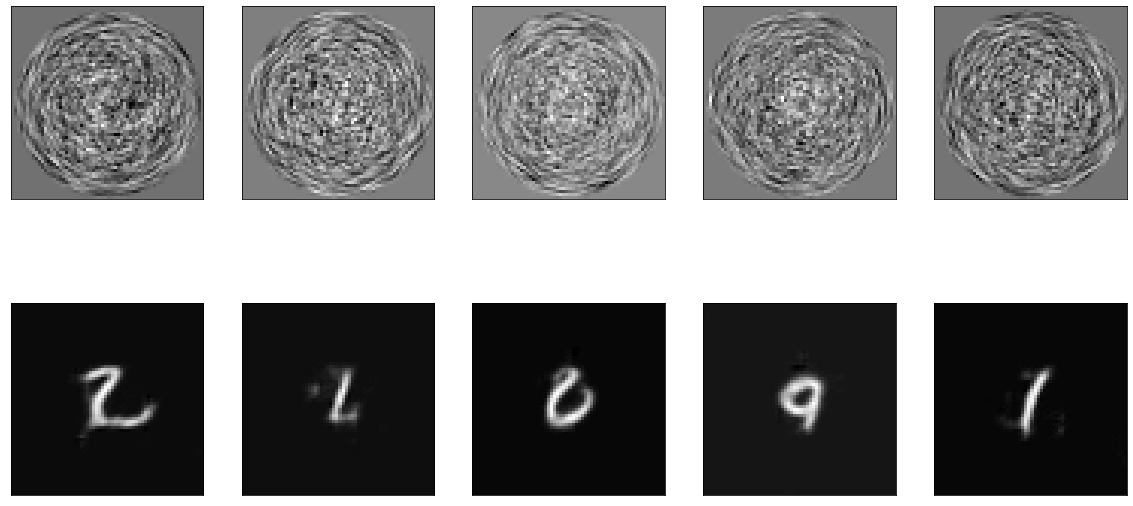

In [ ]:
n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(g_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, n+i)
    plt.imshow(autoencoder.predict(g_test[i:(i+1),:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In the process of trying to improve on the results the code broke down and I decided to omit it. Perhaps more soficticated training could improve on the reconstructions. Maybe even a sparcer set of measured data may be preffered like we disscused in class.

#Problem 4

the coded aperture tomography code presented in https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/rays/codedApertureTomography.ipynb describes 2D reconstruction from 1D measurement data. ***Build a forward model for a system that measures a similar 2D object space from two different angles (e.g. with a coded aperture normal to the x-axis and a coded aperture normal to the y-axis.) How does this system perform compared to the single look system?***

In [ ]:
l= 10
delta=1
N=28
M=128
code=np.random.randint(0,2,M)
def t(x):
  t=code[np.int(np.floor((x+M/2)/delta))]
  return t
vt=np.vectorize(t)
def p(j):
  xj, yj=delta*divmod(j,N)
  xj=xj-N*delta/2
  yj=yj+l
  return xj, yj
def g(j,x):
  g=t((x+(l/p(j)[1])*p(j)[0])/(1+(l/p(j)[1])))
  return g
def h(i,j):
  h=integrate.quad(lambda x: g(j,x), (i-M/2)*delta-delta/2,(i-M/2)*delta +delta/2)[0]
  return h
H=np.zeros((M,N**2))
for j in range(N**2):
  for i in range(M):
    H[i,j]=h(i,j)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


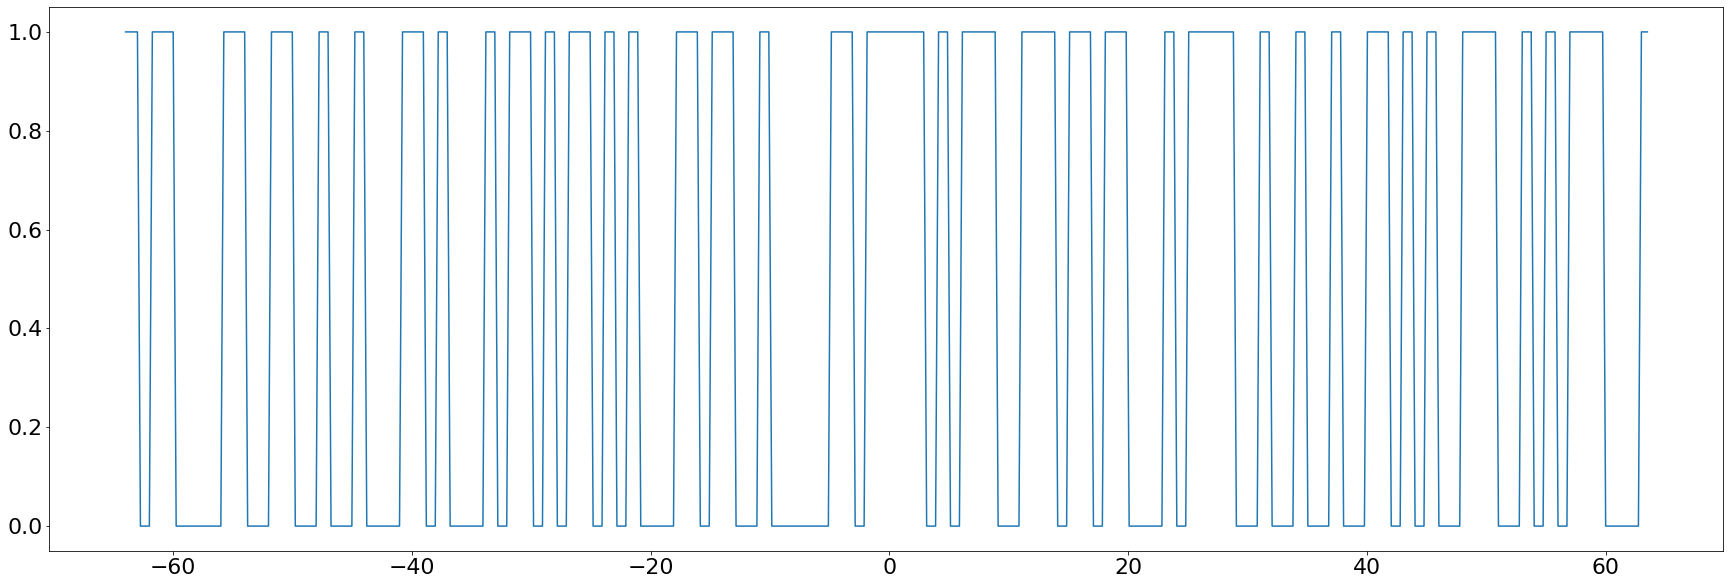

In [ ]:
xspace=np.linspace(-M*delta/2,(M-1)*delta/2,512)
plt.plot(xspace,vt(xspace))

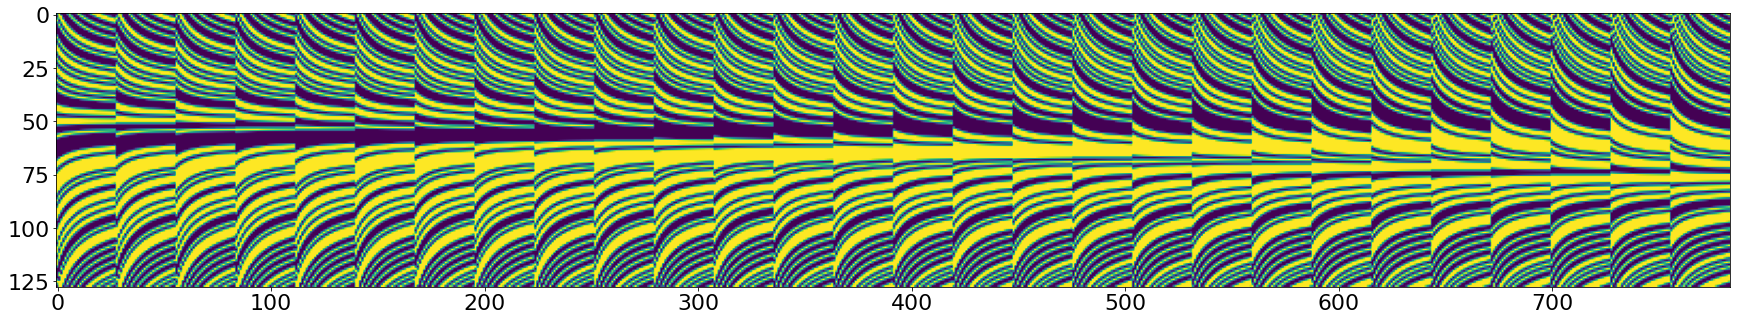

In [ ]:
plt.imshow(H)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


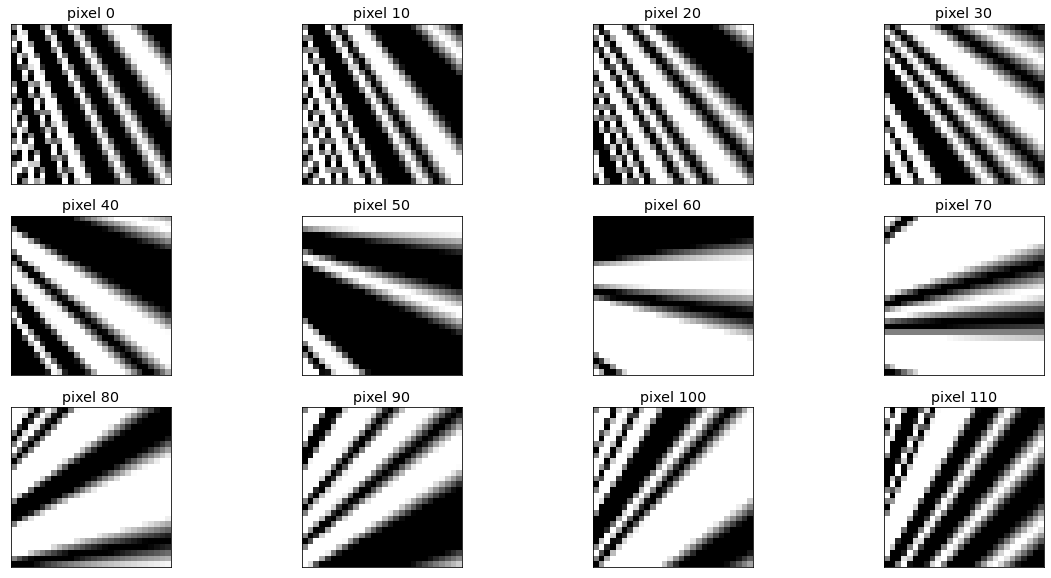

In [ ]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 12})
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(np.reshape(H[10*i,:],(N,N)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('pixel '+np.str(10*i))

In [ ]:
u, lam, vh = np.linalg.svd(H)
ph=np.linalg.pinv(H)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


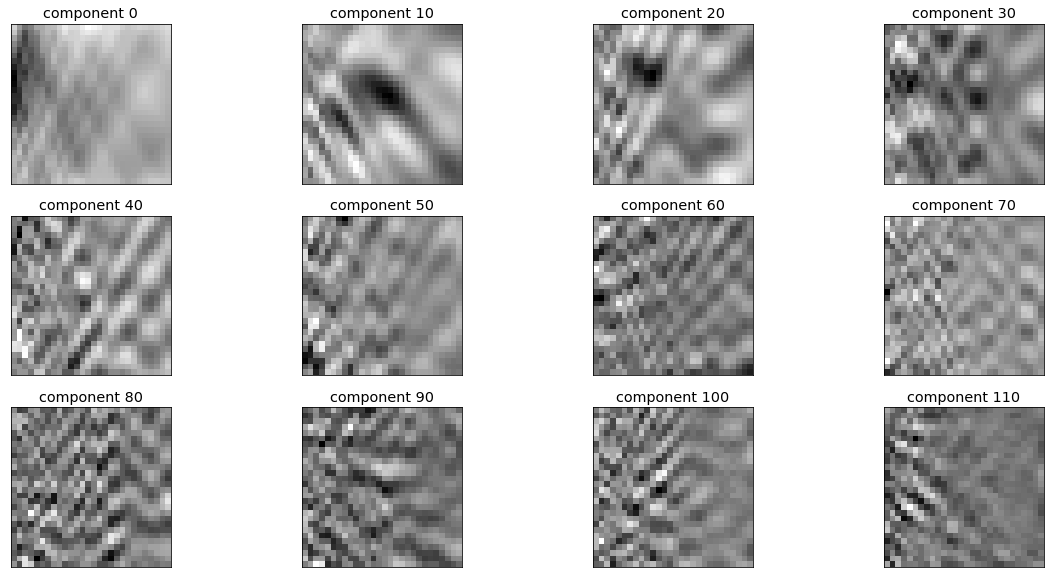

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(np.reshape(vh[10*i,:],(N,N)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('component '+np.str(10*i))

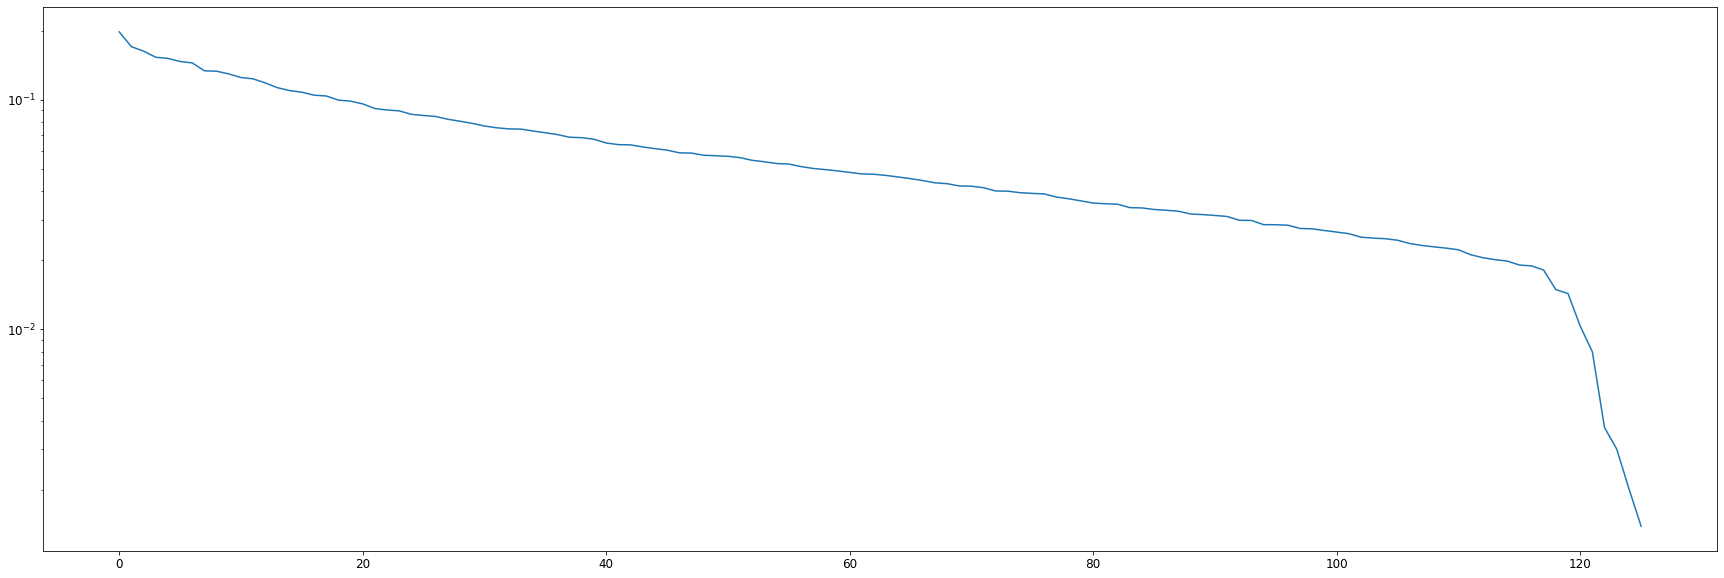

In [ ]:
plt.semilogy(lam[1:127]/lam[0])

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

11501568/11490434 [==============================] - 0s 0us/step


The code below was provided on github from Chiao Chini.

In [ ]:
rotational_matrix = np.zeros((N**2, N**2))
f_impulse = np.zeros((N,N))
k = 0
for i in range(N):
  for j in range(N):
    f_impulse[i,j] = 1
    rotational_matrix[:,k] = np.reshape(np.rot90(f_impulse),(N**2,1))[:,0]
    f_impulse[i,j] = 0
    k += 1
rotational_matrix = np.array(rotational_matrix).astype(int)

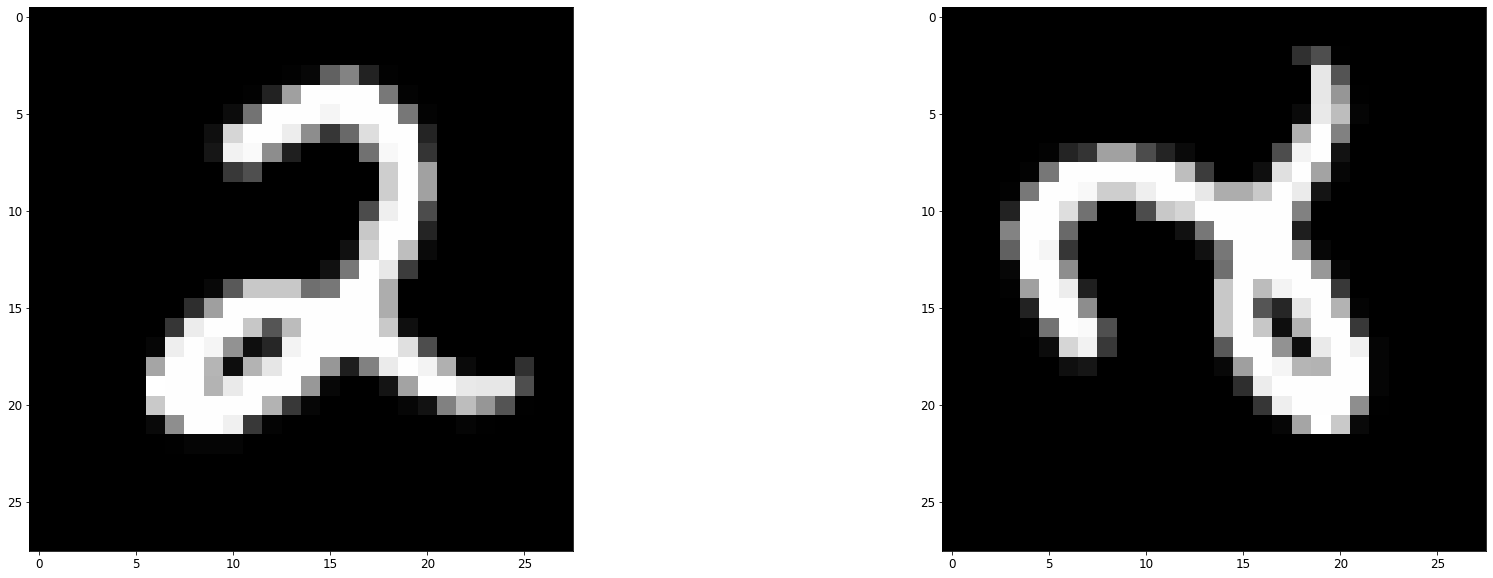

In [ ]:
temp = np.matmul(rotational_matrix,x_train[3333,:,:].reshape(-1))
temp = np.reshape(temp, (N,N))
plt.subplot(1,2,1)
plt.imshow(x_train[3333,:,:])
plt.subplot(1,2,2)
plt.imshow(temp)

In [ ]:
Hy = np.matmul(H,rotational_matrix)
H_all = np.concatenate((H,Hy),axis=0)
ph_all = np.linalg.pinv(H_all)

In [ ]:
g_test_ori=np.zeros(np.shape(x_test))
g_train_ori=np.zeros(np.shape(x_train))

g_test_mod=np.zeros(np.shape(x_test))
g_train_mod=np.zeros(np.shape(x_train))

for pop in range(np.shape(x_test)[0]):
  g_test_ori[pop,:,:] = np.reshape(np.matmul(ph,np.matmul(H,np.reshape(x_test[pop],N**2))),(N,N))
  g_test_ori[pop,:,:] = g_test_ori[pop,:,:]/np.max(g_test_ori[pop,:,:])

  g_test_mod[pop,:,:] = np.reshape(np.matmul(ph_all,np.matmul(H_all,np.reshape(x_test[pop],N**2))),(N,N))
  g_test_mod[pop,:,:] = g_test_mod[pop,:,:]/np.max(g_test_mod[pop,:,:])

for pop in range(np.shape(x_train)[0]):
  g_train_ori[pop,:,:] = np.reshape(np.matmul(ph,np.matmul(H,np.reshape(x_train[pop],N**2))),(N,N))
  g_train_ori[pop,:,:] = g_train_ori[pop,:,:]/np.max(g_train_ori[pop,:,:])

  g_train_mod[pop,:,:] = np.reshape(np.matmul(ph_all,np.matmul(H_all,np.reshape(x_train[pop],N**2))),(N,N))
  g_train_mod[pop,:,:] = g_train_mod[pop,:,:]/np.max(g_train_mod[pop,:,:])

x_train = np.reshape(x_train, (len(x_train), N, N, 1))
x_test = np.reshape(x_test, (len(x_test), N, N, 1))
g_train_ori = np.reshape(g_train_ori, (len(x_train), N, N, 1))
g_test_ori = np.reshape(g_test_ori, (len(x_test), N, N, 1))
g_train_mod = np.reshape(g_train_mod, (len(x_train), N, N, 1))
g_test_mod = np.reshape(g_test_mod, (len(x_test), N, N, 1))

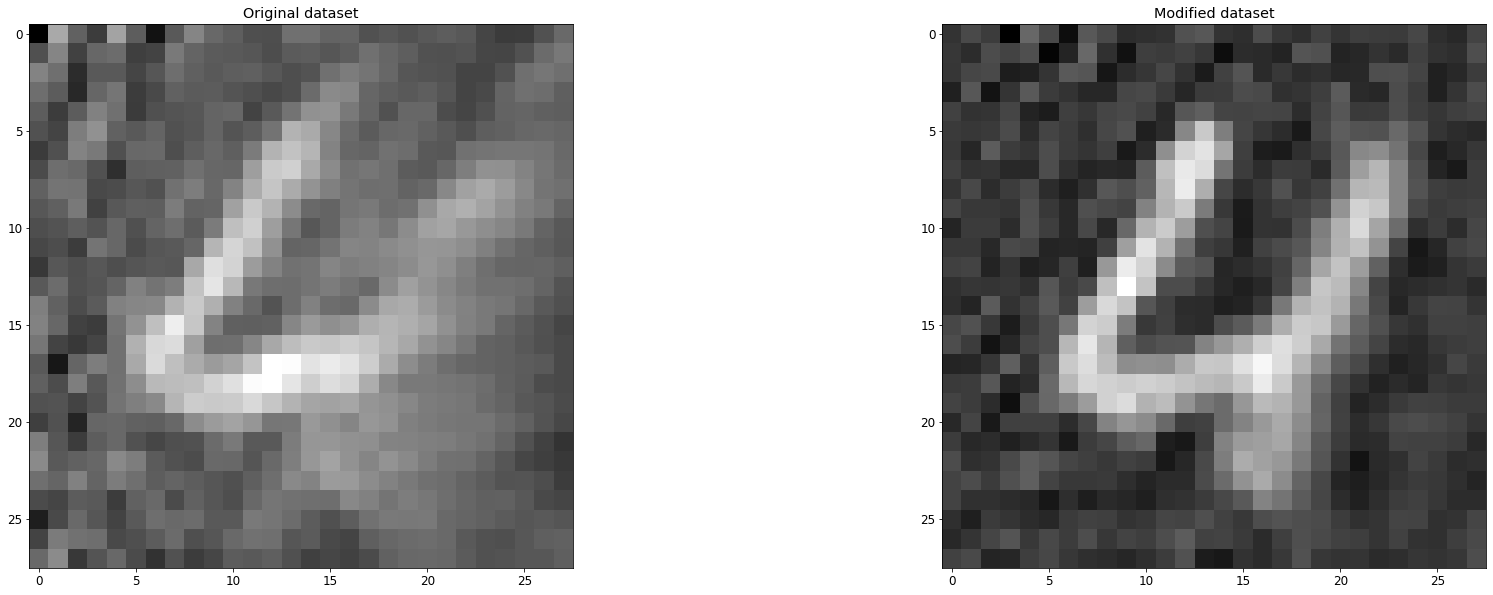

In [ ]:
plt.subplot(1,2,1)
plt.title("Original dataset")
plt.imshow(g_train_ori[64,:,:,0])
plt.subplot(1,2,2)
plt.title("Modified dataset")
plt.imshow(g_train_mod[64,:,:,0])

In [ ]:
inputs=keras.Input(shape=(N, N, 1))

# Encoder
x = layers.Conv2D(32, (5, 5), strides=1, activation="relu", padding="same")(inputs)
x = layers.Conv2D(32, (4, 4), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(16, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(8, (3, 3), activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(1, (3, 3), activation="linear", padding="same")(x)

autoencoder_1 = keras.Model(inputs, x)
autoencoder_1.compile(optimizer='adam', loss='mean_squared_error')

autoencoder_2 = keras.Model(inputs, x)
autoencoder_2.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        16416     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                 

In [ ]:
autoencoder_1.fit(
    x=g_train_ori,
    y=x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test_ori, x_test),
)

Epoch 1/30
469/469 [==============================] - 16s 13ms/step - loss: 0.0166 - val_loss: 0.0085
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0077 - val_loss: 0.0070
Epoch 3/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0067 - val_loss: 0.0060
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 5/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 6/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0055 - val_loss: 0.0057
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 8/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 9/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0050 - val_loss: 0.0052
Epoch 10/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0048 - val_l

In [ ]:
autoencoder_2.fit(
    x=g_train_mod,
    y=x_train,
    epochs=30,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test_mod, x_test),
)

Epoch 1/30
469/469 [==============================] - 7s 13ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 2/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0017 - val_lo

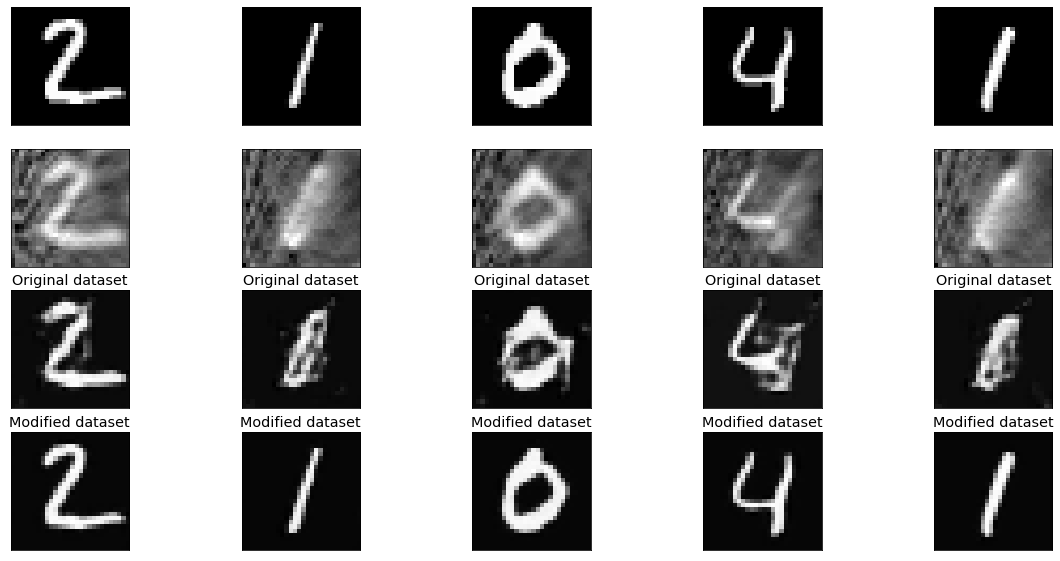

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(4, n, i)
    plt.imshow(x_test[i].reshape(N, N))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, n+i)
    plt.imshow(g_test_ori[i].reshape(N, N))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, 2*n+i)
    plt.imshow(autoencoder_1.predict(g_test_ori[i:(i+1),:,:,:])[0,:,:,0])
    plt.gray()
    plt.title("Original dataset")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(4, n, 3*n+i)
    plt.imshow(autoencoder_2.predict(g_test_mod[i:(i+1),:,:,:])[0,:,:,0])
    plt.gray()
    plt.title("Modified dataset")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Clearly alot better with the modified dataset. The reconstruction from the original dataset is almost un readable. The number 4 in particular is lost. 